# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/fra

# Loading data

In [2]:
DATA_DIR = './natural_images'
CATEGORIES = ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']
IMG_SIZE = 50
data = []
for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), 0)
        new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
        data.append([new_array, class_num])
    

In [3]:
data

[[array([[186, 198, 203, ..., 238, 238, 248],
         [202, 217, 212, ..., 241, 240, 248],
         [188, 195, 206, ..., 241, 240, 249],
         ...,
         [ 30,  28,  23, ...,  45,  41, 165],
         [ 23,  23,  26, ...,  45,  37, 163],
         [ 25,  29,  33, ...,  40,  41, 165]], dtype=uint8),
  0],
 [array([[ 98,  99,  97, ...,  96,  95,  95],
         [ 38,  69, 127, ...,  98,  96,  96],
         [ 94,  16,  20, ...,  98,  96,  96],
         ...,
         [100, 102, 105, ..., 105, 108, 106],
         [103, 103, 106, ..., 107, 108, 106],
         [102, 103, 107, ..., 106, 109, 107]], dtype=uint8),
  0],
 [array([[114, 105, 102, ...,  89,  97,  90],
         [100,  91,  95, ..., 100, 100, 100],
         [121, 100, 108, ...,  93,  91,  95],
         ...,
         [157, 149, 147, ...,  72,  75,  74],
         [ 94,  82,  78, ...,  96, 107,  98],
         [ 37,  39,  34, ...,  98,  94,  89]], dtype=uint8),
  0],
 [array([[127, 130, 130, ..., 126, 126, 127],
         [130, 128, 1

In [4]:
data = np.array(data)

In [5]:
np.shape(data)

(6899, 2)

# separating features and labels

In [6]:
X = []
Y = []
for features, labels in data:
    X.append(features)
    Y.append(labels)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Converting labels to categorical values

In [7]:
Y = to_categorical(Y)

In [8]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# Spliting the data into train, test and validation

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.1, random_state=0)

In [10]:
x_train,  x_val,y_train, y_val = train_test_split(x_train,y_train,test_size=0.1, random_state=0)

# Ploting some values

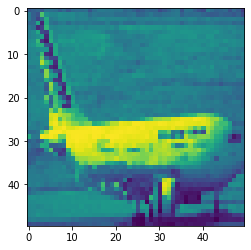

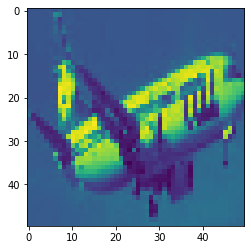

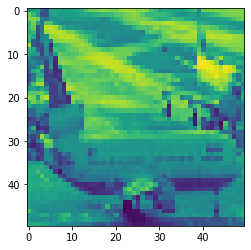

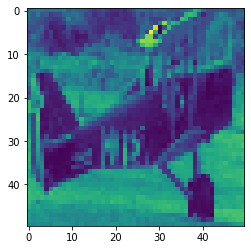

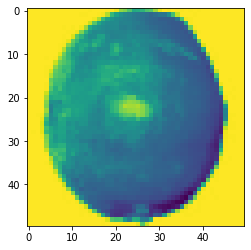

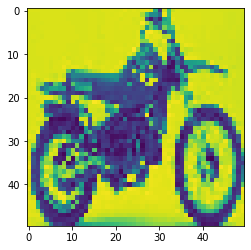

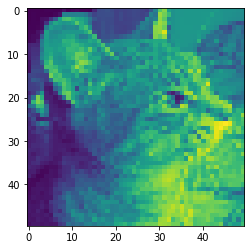

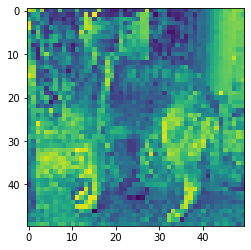

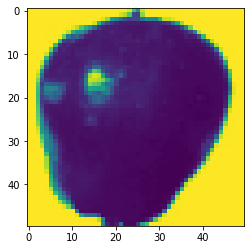

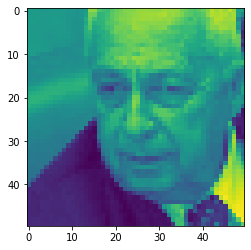

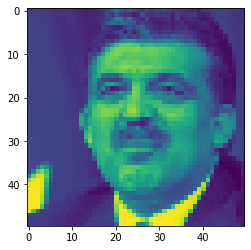

In [11]:

index = [10, 120, 123, 322, 4359, 5374, 2000, 3000, 5000, 6000, 6500]

for i in index:
    grid = X[i].reshape(IMG_SIZE,IMG_SIZE)
    plt.imshow(grid)
    plt.show()

# CNN

In [12]:
import keras
model = Sequential()
model.add(Conv2D(64, 3,activation='relu',data_format='channels_last', input_shape=(50,50,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, 3, activation='relu', data_format='channels_last'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Dropout(0.3))
model.add(Dense(8))
model.add(Dense(8, activation='softmax'))
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1982592   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)              

# Data agumentation

In [13]:
from keras.preprocessing.image import ImageDataGenerator




datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

# fitting the model

In [14]:
batch_size = 32
epochs = 50
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                            
                              )


Epoch 1/50
175/175 [==============================] - 23s 131ms/step - loss: 5.8747 - accuracy: 0.2999 - val_loss: 1.4432 - val_accuracy: 0.4718
Epoch 2/50
175/175 [==============================] - 21s 118ms/step - loss: 1.6723 - accuracy: 0.3942 - val_loss: 1.2329 - val_accuracy: 0.5427
Epoch 3/50
175/175 [==============================] - 22s 123ms/step - loss: 1.5062 - accuracy: 0.4608 - val_loss: 1.3485 - val_accuracy: 0.5105
Epoch 4/50
175/175 [==============================] - 21s 121ms/step - loss: 1.4152 - accuracy: 0.5055 - val_loss: 1.1655 - val_accuracy: 0.5813
Epoch 5/50
175/175 [==============================] - 22s 127ms/step - loss: 1.4511 - accuracy: 0.4889 - val_loss: 1.1114 - val_accuracy: 0.5829
Epoch 6/50
175/175 [==============================] - 22s 125ms/step - loss: 1.3327 - accuracy: 0.5324 - val_loss: 1.0234 - val_accuracy: 0.6409
Epoch 7/50
175/175 [==============================] - 21s 121ms/step - loss: 1.2371 - accuracy: 0.5558 - val_loss: 1.0518 - val_a

# predicting values

In [15]:
y_pred = model.predict(x_test)

# checking accuracy

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred.round(), y_test)

0.7521739130434782

# Plotting training loss vs validation loss

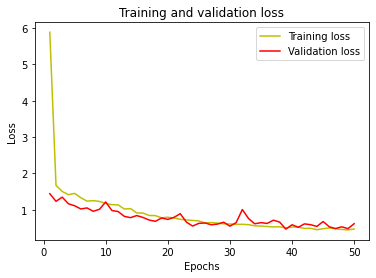

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training accuracy vs validation accuracy


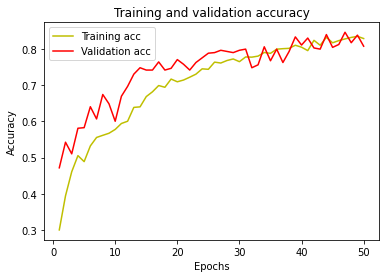

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()